In [1]:
#import dependencies
import matplotlib.pyplot as mlp
import pandas as pd

In [2]:
#read data
city = pd.read_csv("raw_data/city_data.csv")
rides = pd.read_csv("raw_data/ride_data.csv")
city_rides = pd.DataFrame(city)
ride_data = pd.DataFrame(rides)

In [3]:
#merge data and ensure no dupes
merged_df = pd.merge(ride_data, city_rides, on="city")
merged = merged_df.drop_duplicates(subset = "ride_id")
merged.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [4]:
#set up 3 data sets to chart and compare
urban = merged.loc[merged["type"] == "Urban"]
suburban = merged.loc[merged["type"] == "Suburban"]
rural = merged.loc[merged["type"] == "Rural"]

In [17]:
#Avg Fare
urbanfare = urban.groupby("city")["fare"].mean()
suburbanfare = suburban.groupby("city")["fare"].mean()
ruralfare = rural.groupby("city")["fare"].mean()

#Total Rides
urbanrides = urban.groupby("city")["ride_id"].count()
suburbanrides = suburban.groupby("city")["ride_id"].count()
ruralrides = rural.groupby("city")["ride_id"].count()

#Total Drivers
urbandrivers = urban.groupby("city")["driver_count"].count()
suburbandrivers = suburban.groupby("city")["driver_count"].count()
ruraldrivers = rural.groupby("city")["driver_count"].count()

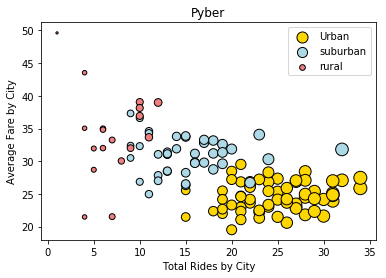

In [32]:
#set up plot
Urban = mlp.scatter(urbanrides, urbanfare, s = urbandrivers*5, color = "gold",edgecolors = "black", label = "Urban")
Suburban = mlp.scatter(suburbanrides, suburbanfare, s = suburbandrivers*5, color = "lightblue", edgecolors = "black", label = "suburban")
Rural = mlp.scatter(ruralrides, ruralfare, s = ruraldrivers*5, color = "lightcoral",edgecolors = "black", label = "rural")
mlp.title("Pyber")
mlp.xlabel("Total Rides by City")
mlp.ylabel("Average Fare by City")
mlp.legend(handles=[Urban, Suburban, Rural], loc="best")

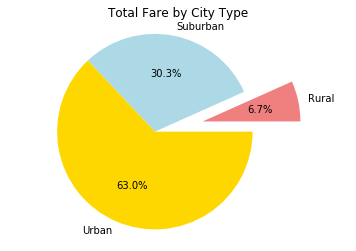

In [56]:
#Total Fare by city type
piefare = merged.groupby("type")["fare"].sum()
mlp.title("Total Fare by City Type")
mlp.pie(piefare, labels=["Rural","Suburban","Urban"], colors = ["lightcoral", "lightblue", "gold"], explode = (.5,0,0), autopct="%.1f%%")
mlp.axis("equal")
mlp.show()

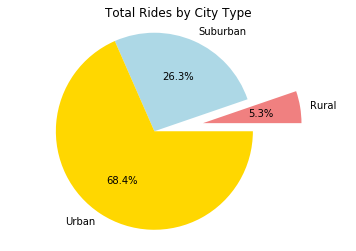

In [57]:
#Total Rides by city type
ridepie = merged.groupby("type")["ride_id"].count()
mlp.title("Total Rides by City Type")
mlp.pie(ridepie, labels = ["Rural","Suburban","Urban"], colors = ["lightcoral", "lightblue", "gold"], explode = (.5, 0, 0), autopct="%.1f%%")
mlp.axis("equal")
mlp.show()

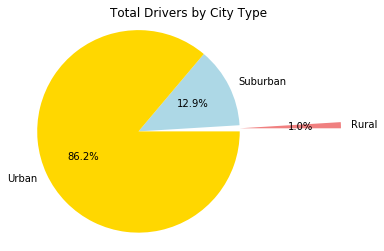

In [65]:
#Total Drivers by city type
driverpie = merged.groupby("type")["driver_count"].sum()
mlp.title("Total Drivers by City Type")
mlp.pie(driverpie, labels=["Rural","Suburban","Urban"], colors = ["lightcoral", "lightblue", "gold"], autopct="%.1f%%", explode = (1, 0, 0))
mlp.axis("equal")
mlp.show() 

In [ ]:
#Observations

#1. Populations from lowest to highest tend to go from Rural, Suburban, to Urban
#2. Avg fare tends to decrease with increased population
#3. Higher populations mean there are typically more rides and drivers